# **Traffic Sign Classification**

## **APPENDIX**

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

### **Task 1: Importing Libraries/Datasets**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [4]:
x_train.shape , y_train.shape

((34799, 32, 32, 3), (34799,))

In [5]:
x_validation.shape, y_validation.shape

((4410, 32, 32, 3), (4410,))

In [6]:
x_test.shape, y_test.shape

((12630, 32, 32, 3), (12630,))

### **Task 2: Image Visualization** 

37

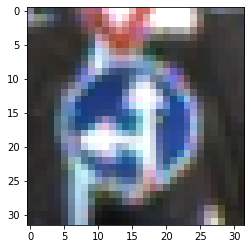

In [7]:
i=np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

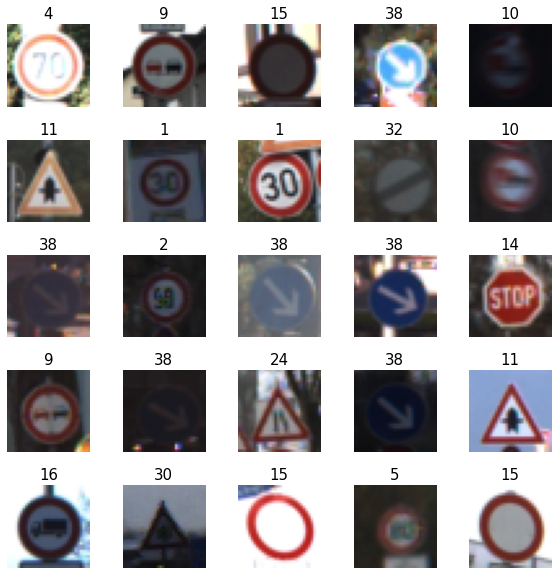

In [8]:
w_grid=5
l_grid=5

fig,axes=plt.subplots(l_grid, w_grid, figsize=(10,10))
axes=axes.ravel()
n_training=len(x_train)

for i in np.arange(0, w_grid*l_grid):
  index=np.random.randint(0, n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index], fontsize=15)
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

### **Task 3: Converting Images to Grayscale and performing Normalization**

In [9]:
from sklearn.utils import shuffle
x_train, y_train= shuffle(x_train, y_train)

In [10]:
x_train_gray = np.sum(x_train/3, axis=3, keepdims=True)
x_validation_gray = np.sum(x_validation/3, axis=3, keepdims=True)
x_test_gray = np.sum(x_test/3, axis=3, keepdims=True)

In [11]:
x_train_gray.shape, x_validation_gray.shape, x_test_gray.shape

((34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

In [12]:
x_train_gray_norm=(x_train_gray-128)/128
x_validation_gray_norm=(x_validation_gray-128)/128
x_test_gray_norm=(x_test_gray-128)/128

In [13]:
x_train_gray_norm

array([[[[-0.70572917],
         [-0.67708333],
         [-0.66666667],
         ...,
         [-0.75      ],
         [-0.7578125 ],
         [-0.76302083]],

        [[-0.69270833],
         [-0.6796875 ],
         [-0.66666667],
         ...,
         [-0.74739583],
         [-0.75      ],
         [-0.76822917]],

        [[-0.640625  ],
         [-0.6953125 ],
         [-0.703125  ],
         ...,
         [-0.73697917],
         [-0.73958333],
         [-0.74479167]],

        ...,

        [[-0.73177083],
         [-0.73177083],
         [-0.72135417],
         ...,
         [-0.75260417],
         [-0.765625  ],
         [-0.76822917]],

        [[-0.7421875 ],
         [-0.75520833],
         [-0.74479167],
         ...,
         [-0.75520833],
         [-0.76041667],
         [-0.75      ]],

        [[-0.73177083],
         [-0.7578125 ],
         [-0.75      ],
         ...,
         [-0.765625  ],
         [-0.76822917],
         [-0.74479167]]],


       [[[-0.8203125 ],


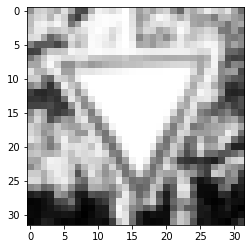

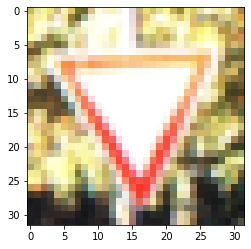

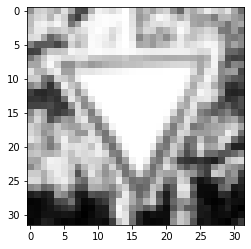

In [14]:
i=np.random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap='gray')

### **Task 4: Building CNN Model**

In [15]:
from tensorflow.keras import datasets, layers, models
cnn=models.Sequential()
cnn.add(layers.Conv2D(6,(5,5), activation='relu', input_shape=(32,32,1)))
cnn.add(layers.AveragePooling2D())
cnn.add(layers.Conv2D(16,(5,5), activation='relu', input_shape=(32,32,1)))
cnn.add(layers.AveragePooling2D())

cnn.add(layers.Dropout(0.2))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(120, activation='relu'))
cnn.add(layers.Dense(84, activation='relu'))
cnn.add(layers.Dense(43, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

### **Task 5: Compiling and Training Model**

In [16]:
cnn.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history=cnn.fit(x_train_gray_norm,
                y_train,
                batch_size=500,
                epochs=5,
                verbose=1,
                validation_data=(x_validation_gray_norm, y_validation))

Epoch 1/5
70/70 [==============================] - 1s 9ms/step - loss: 3.2918 - accuracy: 0.1401 - val_loss: 2.8907 - val_accuracy: 0.2624
Epoch 2/5
70/70 [==============================] - 0s 5ms/step - loss: 1.8717 - accuracy: 0.4837 - val_loss: 1.3246 - val_accuracy: 0.6025
Epoch 3/5
70/70 [==============================] - 0s 5ms/step - loss: 0.9868 - accuracy: 0.7143 - val_loss: 0.8521 - val_accuracy: 0.7562
Epoch 4/5
70/70 [==============================] - 0s 5ms/step - loss: 0.7085 - accuracy: 0.7970 - val_loss: 0.7015 - val_accuracy: 0.8020
Epoch 5/5
70/70 [==============================] - 0s 5ms/step - loss: 0.5734 - accuracy: 0.8377 - val_loss: 0.5958 - val_accuracy: 0.8279


### **Task 6: Model Performance**

In [18]:
score=cnn.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 0.8482 - accuracy: 0.8115
Test Accuracy: 0.8114805817604065


In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

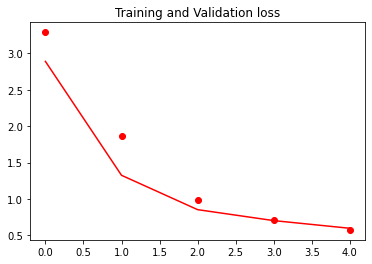

In [21]:
epochs=range(len(accuracy))
plt.plot(epochs, loss, 'ro', label='Training_loss')
plt.plot(epochs, val_loss, 'r', label='Validation_loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

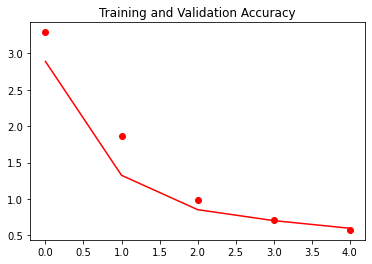

In [22]:
epochs=range(len(accuracy))
plt.plot(epochs, loss, 'ro', label='Training_accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation_accuracy')
plt.title('Training and Validation Accuracy')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


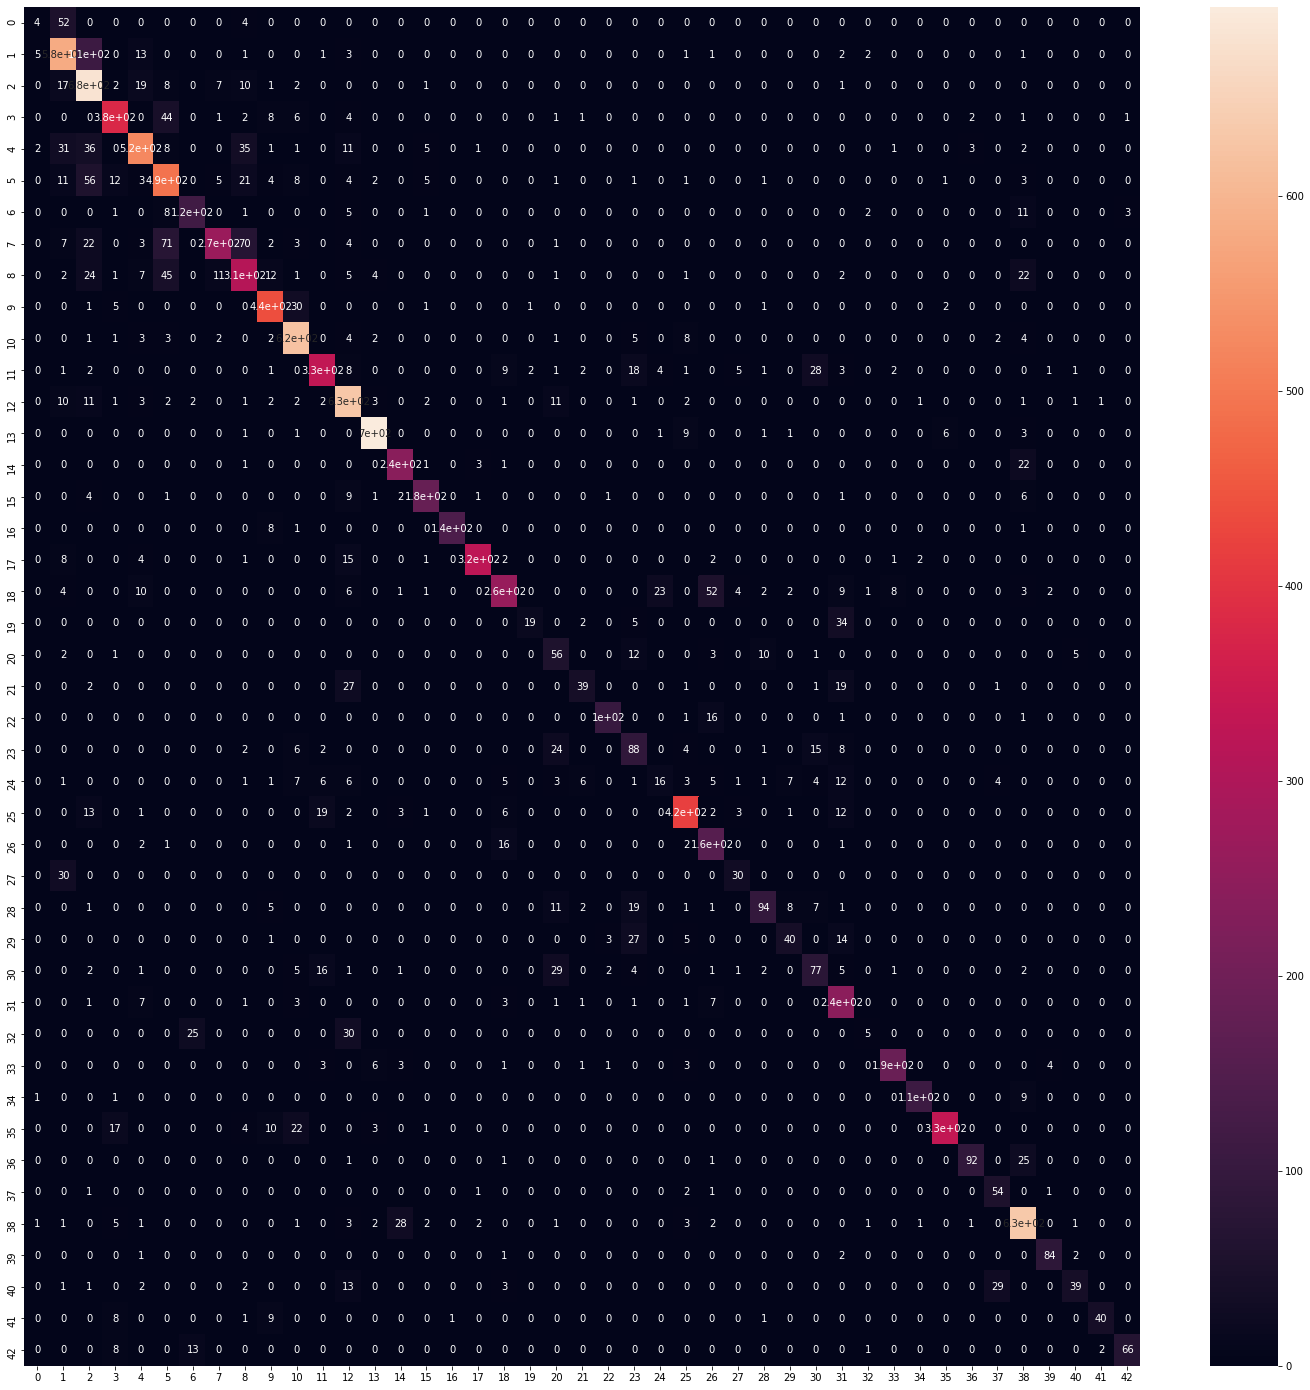

In [23]:
predicted_classes = cnn.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

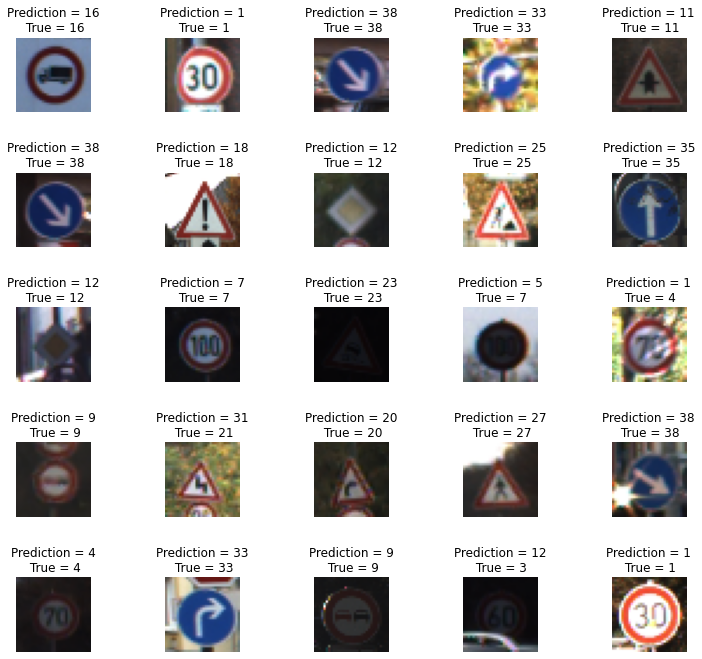

In [24]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   